## Text Analysis

- We already saw regular expressions
- Dictionary Base methods:
    - Bag of word analysis
    - Base sentiment analysis

## Today we see

- Word clouds as a descriptive methods
- Unsupervised learning method for topic analysis
- Lexical diversity analysis
- How to use big LLM with Python

## Descriptive Methods

### Word Clouds

An easy way to identify what's going on in a text or a corpus of text: look at most recurring keywords.

- To look at most recurring keywords, a very important step is going to `clean` the data.

We must remove from it the useless information!

For now let's give it a simple try!

In [ ]:
!pip install wordcloud

In [1]:
from wordcloud import WordCloud
# Make up the wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(
"""
This was written for the purpose of the python class. We're learning python and programming together,
and it's a lot of work. But we hope it's very rewarding because python is used throughout the world.
""")
wordcloud.words_

{'python': 1.0,
 'written': 0.3333333333333333,
 'purpose': 0.3333333333333333,
 'class': 0.3333333333333333,
 'learning': 0.3333333333333333,
 'programming': 0.3333333333333333,
 'together': 0.3333333333333333,
 'lot': 0.3333333333333333,
 'work': 0.3333333333333333,
 'hope': 0.3333333333333333}

Let's apply this function to random interviews from our corpus

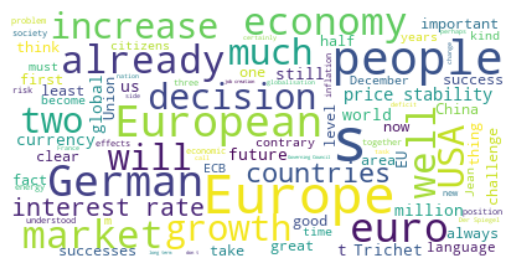

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('../class7/interviews.csv')

# Make up the wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(dataset.loc[6, 'content'])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaning the text

A lot of words in the text are actually not information you want to keep, a usual, almost necessary, step in this kind of exercise are stopword removal.

- For each language a list of words bearing no information about the content of the texts has been defined.
    - We remove all those words from our corpus

In [5]:
from wordcloud import STOPWORDS

stopword12345 = set(STOPWORDS)
print(stopwords)

{'while', 'however', 'own', 'k', 'had', 'get', 'was', 'a', "we've", 'ought', 'that', 'the', 'or', 'here', 'she', 'ourselves', 'which', 'down', 'before', "hasn't", 'against', 'is', 'in', 'else', "we're", 'an', 'it', 'am', 'hence', 'such', 'nor', 'over', 'not', "when's", 'their', "you've", "mustn't", "it's", "here's", "he's", 'were', "can't", "why's", 'therefore', 'at', 'we', 'should', 'yours', 'they', 'when', "she'd", 'too', 'him', "we'll", "he'd", 'also', "wasn't", "doesn't", 'all', "don't", 'very', 'been', "haven't", 'why', 'have', 'whom', 'itself', 'my', 'www', 'her', 'yourselves', 'doing', 'these', "let's", "they're", 'hers', 'cannot', 'does', 'has', 'yourself', 'this', 'what', 'then', 'shall', "they've", "aren't", "won't", 'as', 'some', 'those', 'out', 'by', 'your', "you're", 'can', 'few', 'ever', "i'll", "that's", 'between', 'further', 'them', "he'll", "i'm", 'until', "i've", 'our', 'would', 'if', "shan't", 'to', 'of', 'most', "hadn't", "she's", 'than', 'be', 'under', 'his', 'beca

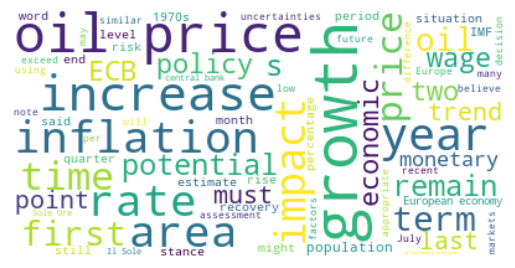

In [7]:
stopword12345.add('ageing')
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",
                     stopwords = stopword12345).generate(dataset.loc[4, 'content'])
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

When words are conjugated, they don't count as the same:

- For example `grow` and `growth`, depending on the library you use, might not match together.
- A way to improve on your code is to make them match. Two processes are available to do so:
    - `Stemming` - Truncating to a root that might not exist.
    - `Lemmatizing` - going back to the word root of a term, it should exist in a dictionary.
- Both process involve modifying every word of a corpus to go back to the root of the word.

### Learning based methods

What is learning?

- Unsupervised learning.
    - Algorithmic based.
    - Neural network based.
- Supervised learning.
    - Annotated data.

We'll use the library `spacy` it's the one i'm most used to but feel free to try others:

- `nltk` is a famous alternative - `spacy` is overtaking it in my opinion.
- `transformers` is the up and coming library that does things very well - it will probably overtake `spacy`

In [31]:
!pip install spacy

When you use spacy, you use pre-trained artificial intelligence.

- The artificial intelligence was trained on a corpus of documents already.
    - You need to select a how big the corpus of documents your artificial intelligence was built on.
    - If you study ECB speeches or literary texts, you might not want to use the same.
- Ultimately, those are empirical questions, and there's no one size fits all.
- For our purpose a "core" corpus taken from the web, at a small scale, is perfectly fine.

In [32]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 3.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 7.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 11.1 MB/s eta 0:00:01
     ---------- ----------------------------- 3.3/12.8 MB 13.1 MB/s eta 0:00:01
     ------------- -------------------------- 4.3/12.8 MB 15.2 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 15.9 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 16.4 MB/s eta 0:00:01
     ---------------------- ----------------- 7.0/12.8 MB 17.3 MB/s eta 0:00:01
     ------------------------ --------------- 8.0/12.8 MB 17.6 MB/s eta 0:00:01
     ---------------------------- ----------- 9.0/1

Then when we create "natural language pipeline" we must call the corpus of text we wish to use.

In [8]:
import spacy

# Import the core library for english words
nlp = spacy.load('en_core_web_sm')

In [10]:
from random import choice
# Let's lemmatize a random paragraph of our dataset
random_par = dataset.sample(n=1)['content'].values[0].split('\n')
random_par = choice(random_par).split(' ')
print(random_par)

['The', 'programme', 'you', 'are', 'talking', 'about', 'is', 'designed', 'to', 'purchase', 'private', 'and', 'public', 'sector', 'securities.', 'Why', 'are', 'we', 'doing', 'that?', 'We', 'are', 'doing', 'that', 'to', 'put', 'downward', 'pressure', 'on', 'interest', 'rates.', 'Mechanically,', 'our', 'actions', 'are', 'transmitted', 'along', 'the', 'entire', 'chain', 'of', 'financial', 'products', 'and', 'loans', 'extended', 'to', 'businesses', 'and', 'households.', 'If', 'the', 'ECB', 'lowers', 'the', 'interest', 'rates', 'that', 'countries', 'have', 'to', 'pay', 'to', 'borrow,', 'this', 'has', 'a', 'mechanical', 'effect', 'that', 'also', 'lowers', 'the', 'rates', 'offered', 'to', 'businesses', 'and', 'households.']


In [12]:
random_par = [x for x in random_par if x.lower() not in stopwords]
print(random_par)

['programme', 'talking', 'designed', 'purchase', 'private', 'public', 'sector', 'securities.', 'that?', 'put', 'downward', 'pressure', 'interest', 'rates.', 'Mechanically,', 'actions', 'transmitted', 'along', 'entire', 'chain', 'financial', 'products', 'loans', 'extended', 'businesses', 'households.', 'ECB', 'lowers', 'interest', 'rates', 'countries', 'pay', 'borrow,', 'mechanical', 'effect', 'lowers', 'rates', 'offered', 'businesses', 'households.']


In [13]:
random_par = ' '.join(random_par)
print(random_par)

programme talking designed purchase private public sector securities. that? put downward pressure interest rates. Mechanically, actions transmitted along entire chain financial products loans extended businesses households. ECB lowers interest rates countries pay borrow, mechanical effect lowers rates offered businesses households.


In [14]:
# Process the text using spaCy 
doc = nlp(random_par)
print(doc)
print(type(doc))

programme talking designed purchase private public sector securities. that? put downward pressure interest rates. Mechanically, actions transmitted along entire chain financial products loans extended businesses households. ECB lowers interest rates countries pay borrow, mechanical effect lowers rates offered businesses households.
<class 'spacy.tokens.doc.Doc'>


In [19]:
[token.lemma_ for token in doc if token.is_stop == False]

['programme',
 'talk',
 'design',
 'purchase',
 'private',
 'public',
 'sector',
 'security',
 '.',
 '?',
 'downward',
 'pressure',
 'interest',
 'rate',
 '.',
 'mechanically',
 ',',
 'action',
 'transmit',
 'entire',
 'chain',
 'financial',
 'product',
 'loan',
 'extend',
 'business',
 'household',
 '.',
 'ECB',
 'lower',
 'interest',
 'rate',
 'country',
 'pay',
 'borrow',
 ',',
 'mechanical',
 'effect',
 'lower',
 'rate',
 'offer',
 'business',
 'household',
 '.']

In [22]:
from random import choice
# Let's lemmatize a random paragraph of our dataset
random_par = dataset.sample(n=1)['content'].values[0].split('\n')
random_par = choice(random_par).split(' ')

# Remove stop words and lemmatize
random_par = ' '.join([x for x in random_par if x not in stopwords])

# Process the text using spaCy 
doc = nlp(random_par)
 
# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc if token.is_stop == False]
 
# Join the lemmatized tokens into a sentence
lemmatized_text = ' '.join(lemmatized_tokens)
 
print(random_par, '\n')
print(lemmatized_text)

I don’t want theorise concerning destiny Greece. If take look examples, defaults United States monetary unions, political consequences. What matters European countries’ perception political cohesion willingness remain together. The euro area seen mere cooperation sovereign states, less imagine making extra effort necessary remain united. And believe euro single market, will believe willing defend possible means. The political will save euro severely underestimated markets. 

want theorise concern destiny Greece . look example , default United States monetary union , political consequence . matter european country ’ perception political cohesion willingness remain . euro area see mere cooperation sovereign state , imagine make extra effort necessary remain united . believe euro single market , believe willing defend possible mean . political save euro severely underestimate market .


Our spacy natural language pipeline can do a lot of different things. Cleaning, but also flagging what the information is

In [36]:
# Put a random text
text = "I am studying at Unib, we are studying Python. My name is Maria"
doc = nlp(text)

# Let's make our model tell us about the element of that text
word = [text.text for text in doc]
positions = [text.pos_ for text in doc]

sentance = pd.DataFrame({'words':word, 'pos': positions})
print(sentance)

       words    pos
0          I   PRON
1         am    AUX
2   studying   VERB
3         at    ADP
4       Unib  PROPN
5          ,  PUNCT
6         we   PRON
7        are    AUX
8   studying   VERB
9     Python  PROPN
10         .  PUNCT
11        My   PRON
12      name   NOUN
13        is    AUX
14     Maria  PROPN


This could be a point of departure for your cleaning:

- You want to remove all punctuation for sure.
- Auxiliaries are not very useful.
- Pronouns aren't either.

Let's also remove other parts of texts that do not contribute to us understanding its meaning from words:

    - Punctuation
    - Stopwords
    - Numbers
    - Special signs: percentages, apostrophes, quotation marks ..
    
Let's create a cleaning pipeline

In [23]:
# Clean text
def cleaning_text(text_elem):
    # You apply the spacy functions
    doc = nlp(text_elem)
    
    # We now proceed token by token, keep only the ones we want, remove the others
    doc = [token for token in doc if token.is_stop == False]
    doc = [token for token in doc if token.is_punct == False]
    doc = [token for token in doc if token.is_alpha == True]
    
    # And now we lemmatize
    doc = [token.lemma_ for token in doc]
    
    cleaned_text = ' '.join(doc)
    return(cleaned_text)

Let's try our function

In [24]:
# Let's clean a random part paragraph of our dataset
random_par = dataset.sample(n=1)['content'].values[0].split('\n')
random_par = choice(random_par)

# We clean and lemmatize
cleaned = cleaning_text(random_par)

# Print both
print(random_par, '\n')
print(cleaned)

They gave Greece the time and the freedom to reform its economy, for example its labour market, while envisaging a demanding budgetary path, but taking account of the deteriorating economic climate. The primary surplus requested was reduced to 1% of GDP in 2015, compared with 3% previously. We were also proposing larger cuts in military spending to create room for manœuvre elsewhere. 

give Greece time freedom reform economy example labour market envisage demand budgetary path take account deteriorate economic climate primary surplus request reduce GDP compare previously propose large cut military spending create room manœuvre


We have a function we're reasonably happy with, let's apply it to all interviews:

- Even for a simple exercise like this one, it will take a very long time:
    - The code is not optimized.
    - Lemmatizing is a complicated operation, that's why some people prefer to simply stem.

But once it's done, we do not need to think about it anymore

In [25]:
# Simply apply our function/pipeline to every piece of content
dataset['content_clean'] = dataset['content'].apply(lambda x: cleaning_text(x))
#dataset = pd.read_csv('../class7/interviews_cleaned.csv')

In [26]:
dataset

,year,title,content,content_clean
0,2004,"Interview with Mr José Manuel González-Páramo,...","Beda Romano, Il Sole 24 Ore, 8 December 2004\n...",Beda Romano Il Sole Ore December Greece create...
1,2004,"Interview with Prof. Otmar Issing, (Delo, Slov...",published on 4 December 2004\nDelo (D): The eu...,publish December Delo d euro existence year ap...
2,2004,"Interview with Mr José Manuel González-Páramo,...","by Mrs Marietta Kurm-Engels, Handelsblatt\nThe...",Mrs Marietta Kurm Engels Handelsblatt Governin...
3,2004,"Interview with Jean-Claude Trichet, President ...",Conducted by Corinne Lhaïk (L'Express) on 29 S...,conduct Corinne Lhaïk September english transl...
4,2004,"Interview with Lucas Papademos, Vice-President...",Conducted by Beda Romano (Il Sole 24 Ore) on 5...,conduct Beda Romano Il Sole Ore August english...
...,...,...,...,...
522,2023,INTERVIEWInterview with Bloomberg,"Interview with Isabel Schnabel, Member of the ...",interview Isabel Schnabel Member Executive Boa...
523,2023,INTERVIEWQ&A on Twitter,"Interview with Isabel Schnabel, Member of the ...",interview Isabel Schnabel Member Executive Boa...
524,2023,INTERVIEWInterview with Süddeutsche Zeitung,"Interview with Luis de Guindos, Vice-President...",interview Luis de Guindos Vice President ECB c...
525,2023,INTERVIEWInterview with Handelsblatt,"Interview with Fabio Panetta, Member of the Ex...",interview Fabio Panetta Member Executive Board...


Let's try with random sample of wordclouds and see if the result is better - but for this kind of analysis it shouldn't make such a big difference

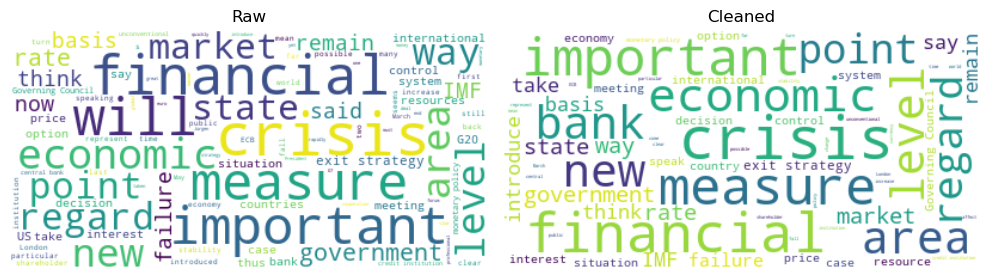

In [28]:
idx = 55
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white",
                     stopwords = stopwords).generate(dataset.loc[idx, 'content'])
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white",
                     stopwords = stopwords).generate(dataset.loc[idx, 'content_clean'])
# Display the generated image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))  # Adjust figsize to fit your screen

# Display word cloud images
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Raw')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Cleaned')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### Exercise 14: Let's create 3 wordclouds.

- Join together the interviews from 2004 to 2008
- Join together the interviews from 2008 to 2014
- Join together the interviews from 2015 to 2022

Then we apply our wordclouds, and see if we can see differences between the different eras of the ECB

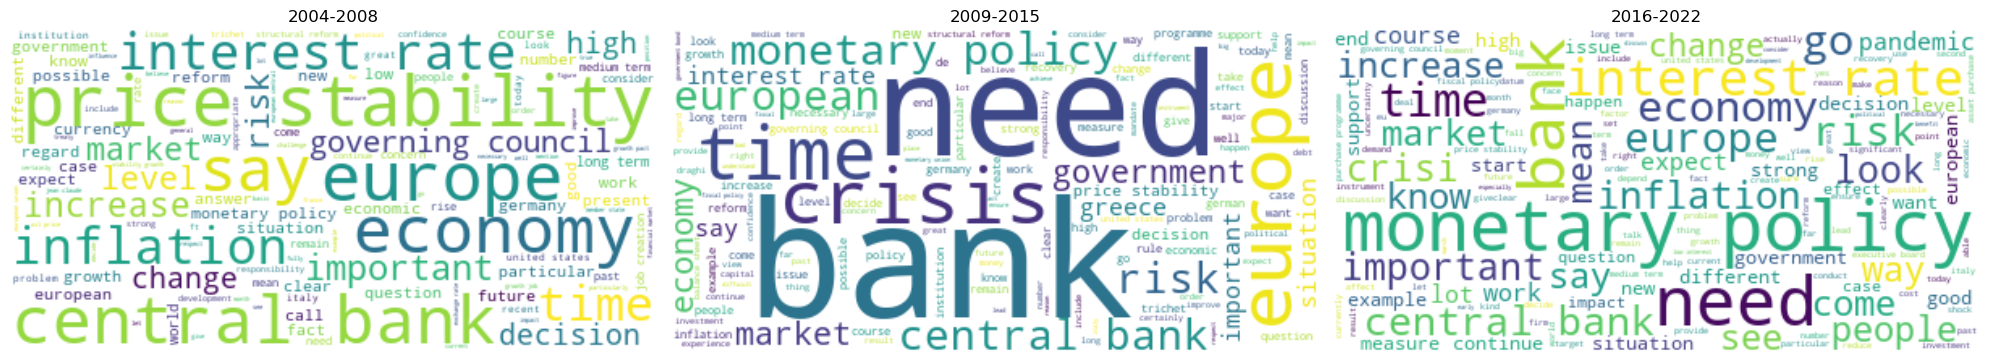

In [32]:
first_corpus = ' '.join(dataset.loc[(dataset['year'] <= 2008) , 'content_clean'].tolist()).lower()
second_corpus = ' '.join(dataset.loc[(dataset['year'] <= 2015) & (dataset['year'] > 2008), 'content_clean'].tolist()).lower()
third_corpus = ' '.join(dataset.loc[(dataset['year'] > 2015), 'content_clean'].tolist()).lower()
# Make up the wordcloud
add_other_stopword = ['euro', 'area', 'ecb', 'year', 'country', 'think']
[STOPWORDS.add(x) for x in add_other_stopword]

wordcloud1 = WordCloud(max_font_size=100, background_color="white", stopwords = STOPWORDS).generate(first_corpus)
wordcloud2 = WordCloud(max_font_size=100, background_color="white", stopwords = STOPWORDS).generate(second_corpus)
wordcloud3 = WordCloud(max_font_size=100, background_color="white", stopwords = STOPWORDS).generate(third_corpus)

# Setup a matplotlib figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))  # Adjust figsize to fit your screen

# Display word cloud images
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('2004-2008')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('2009-2015')

ax3.imshow(wordcloud3, interpolation='bilinear')
ax3.axis("off")
ax3.set_title('2016-2022')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

This kind of analysis, whilst not being very useful in general for academic papers, can make for very nice visualizations!

- see https://www.datacamp.com/tutorial/wordcloud-python for more on this

### Unsupervised learning

A very guided version of it. Unsupervised learning rarely corresponds to what we imagine machine learning is

- Latent Dirichlet Allocation (LDA) - today
- Principal component analysis - often interpreted as unsupervised learning
- k-methods

### Topic modelling

The kind of unsupervised learning we'll apply is called Latent Dirichlet Allocation:

- In a corpora of texts, we want to identify the items that are similar to each others.

How?

- You assume that documents in your corpora, have a distinct topics.
- You assume a document from a topics has probability to contain specific words.

Given these assumptions, you have a certain probability to observe the texts.

- You assign each text to each topics so as to maximize that probability

On the documents side, the information extracted by this algorithm will be:

- Document 1 of our corpus is 85% topic A, 10% topic B, 5% the rest
- Document 2 of our corpus is ...

and on the topic sides:

- Topic A is characterized in 90% of the times by word xxx, by word yyy in 80% of the time..
- Topic B is characterized in ...

We'll use yet another package. For MAC and Linux users installing these packages is very easy, just type the usual `pip install`, but you need to `downgrade` the library `scipy` because `gensim` is built on functions from `scipy` that no longer exist.

For PC users you might also need to :

- go to: https://visualstudio.microsoft.com/visual-cpp-build-tools/
- download build tools and install the base
- go to "visual studio installer" and modify the build of "visual studio build tools 2022"
- include in your build the desktop development C++
- Reboot your PC

In [407]:
!pip install gensim
!pip install scipy==1.12.0

  Using cached lda-2.0.0.tar.gz (320 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pbr-3.1.1-py2.py3-none-any.whl.metadata (2.9 kB)
Using cached pbr-3.1.1-py2.py3-none-any.whl (99 kB)
  Running setup.py clean for lda
Failed to build lda


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [161 lines of output]
  C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\setuptools\dist.py:498: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          This deprecation is overdue, please update your project and remove deprecated
          calls to avoid build errors in the future.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, section)
  C:\Users\anato\anaconda3\envs\python-econ\Lib\site-pac

With most libraries, to perform any text analysis, a text pre-processing step is extremely important.

- For demonstration purposes, we'll keep pre-processing to a minimum but somes steps cannot be ignored to first run the function.
- We'll see that with minimal pre-processing, it's impossible to get meaningful results.

In [33]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Take our documents, transform it so that each word is divided
documents = dataset.loc[: , 'content_clean'].tolist()
processed_texts  = [[word for word in doc.split(' ')] for doc in documents]
 
id2word = corpora.Dictionary(processed_texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]

In [34]:
from gensim.models.ldamodel import LdaModel
import pandas as pd

# Set number of topics
num_topics = 10

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, 
                     random_state=42, passes=10, alpha="auto", per_word_topics=True)

In [35]:
from pprint import pprint

pprint(lda_model.print_topics())

[(0,
  '0.018*"digital" + 0.015*"payment" + 0.009*"euro" + 0.008*"money" + '
  '0.007*"productivity" + 0.007*"growth" + 0.006*"cash" + 0.006*"investment" + '
  '0.005*"market" + 0.005*"ECB"'),
 (1,
  '0.038*"de" + 0.027*"la" + 0.015*"et" + 0.013*"des" + 0.013*"les" + '
  '0.013*"le" + 0.011*"que" + 0.011*"en" + 0.010*"à" + 0.010*"qui"'),
 (2,
  '0.018*"euro" + 0.011*"area" + 0.010*"country" + 0.010*"ECB" + 0.009*"price" '
  '+ 0.008*"rate" + 0.008*"economy" + 0.007*"bank" + 0.007*"stability" + '
  '0.007*"market"'),
 (3,
  '0.036*"bank" + 0.013*"ECB" + 0.009*"banking" + 0.007*"capital" + '
  '0.007*"risk" + 0.006*"rate" + 0.006*"interest" + 0.006*"crisis" + '
  '0.006*"country" + 0.006*"need"'),
 (4,
  '0.014*"ECB" + 0.012*"policy" + 0.012*"euro" + 0.009*"bank" + '
  '0.009*"country" + 0.009*"area" + 0.009*"monetary" + 0.008*"rate" + '
  '0.007*"crisis" + 0.007*"market"'),
 (5,
  '0.025*"inflation" + 0.016*"rate" + 0.013*"policy" + 0.010*"year" + '
  '0.010*"think" + 0.009*"price" + 0.

In [48]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.44322190677107304


Now we want to visualize what happens

In [22]:
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.6 MB 5.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 5.9 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.6 MB 6.1 MB/s eta 0:00:01
   --------------------- ------------------ 1.4/2.6 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 6.7 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 2.5/2.6 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.1 kB ? eta -:--:--
   ---------------------------------------- 97.1/97.1 kB 5.4 MB/s eta 0:00:00


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)

In [37]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.145381  0.009393       1        1  36.707263
5     -0.153887  0.018569       2        1  23.699061
2     -0.134997  0.010353       3        1  16.256002
6     -0.110626  0.013582       4        1   7.244527
8     -0.110000  0.023705       5        1   6.061982
3     -0.115106  0.020801       6        1   5.167231
1      0.143537 -0.269728       7        1   1.536102
0     -0.016846  0.010685       8        1   1.480920
9      0.366433  0.066889       9        1   1.194592
7      0.276872  0.095751      10        1   0.652320, topic_info=           Term         Freq        Total Category  logprob  loglift
62         bank  4293.000000  4293.000000  Default  30.0000  30.0000
127        euro  4779.000000  4779.000000  Default  29.0000  29.0000
1029         de   596.000000   596.000000  Default  28.0000  28.0000
7           ECB  5151.000000  5151.000000  Default  27.0000  27.0000
617   inflation  4667.000000  4667.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3379        von    11.336189    47.105599  Topic10  -5.6543   3.6080
4906        Sie    10.434852    34.200037  Topic10  -5.7372   3.8453
8671        sie     9.893678    26.622316  Topic10  -5.7904   4.0425
8497      haben    10.634341    45.405905  Topic10  -5.7182   3.5808
8771        wir    10.010732    55.421526  Topic10  -5.7787   3.3211

[791 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
7673       6  0.809484  ACPR
11882      6  0.808569  AMCs
9108       1  0.083101   APP
9108       2  0.899000   APP
9108       6  0.007555   APP
...      ...       ...   ...
338        9  0.017127     à
10065      7  0.960496    ça
12757      2  0.918329     è
7063       7  0.936725   été
7658       7  0.974122  être

[2349 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 7, 9, 4, 2, 1, 10, 8])

We have some interviews that are either in French or German. That's not good. We want to drop those interviews, because the topic analysis concentrated on those interviews:

- We can use langdetect to do so.

In [141]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
      ------------------------------------ 20.5/981.5 kB 682.7 kB/s eta 0:00:02
     ---------- --------------------------- 266.2/981.5 kB 3.3 MB/s eta 0:00:01
     --------------------- ---------------- 553.0/981.5 kB 5.0 MB/s eta 0:00:01
     -------------------------------- ----- 829.4/981.5 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=b1e8e37314af16175f5bcb14d07369519425f0a35affec4055e72c0ed8624af0
  Stored in directory: c:\users\anato\appdata\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


Let's apply it to our data, and find those interviews that are done in a language that confuses our algorithm

In [38]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

# Add a column to the dataset
dataset['language'] = dataset['content'].apply(lambda x: detect(x))
dataset['language'].value_counts()

language
en    518
fr      4
de      3
nl      1
it      1
Name: count, dtype: int64

So now we limit ourselves to texts in English

In [39]:
dataset = dataset.loc[dataset['language'] == 'en']

Let's repeat all of our previous analysis

In [40]:
# Take our documents, transform it so that each word is divided
documents = dataset.loc[: , 'content_clean'].tolist()
processed_texts  = [[word for word in doc.split(' ')] for doc in documents]
 
id2word = corpora.Dictionary(processed_texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]


# Set number of topics
num_topics = 10

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha="auto", per_word_topics=True)

Let's look at the coherence score again

In [55]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.31038638941069147


In [41]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004417 -0.012299       1        1  32.757230
9      0.036839 -0.021100       2        1  24.371376
5     -0.057128  0.009168       3        1  14.339131
3     -0.034683 -0.018548       4        1   7.667858
8     -0.046185  0.001324       5        1   6.331560
4     -0.119793  0.049705       6        1   4.864996
6      0.009663 -0.103021       7        1   4.293124
0      0.059611 -0.049715       8        1   3.226421
1      0.097634  0.054406       9        1   1.694822
7      0.058459  0.090081      10        1   0.453482, topic_info=           Term         Freq        Total Category  logprob  loglift
7           ECB  5087.000000  5087.000000  Default  30.0000  30.0000
62         bank  4257.000000  4257.000000  Default  29.0000  29.0000
617   inflation  4680.000000  4680.000000  Default  28.0000  28.0000
127        euro  4713.000000  4713.000000  Default  27.0000  27.0000
702      policy  4625.000000  4625.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
239       price     7.128593  2953.451685  Topic10  -5.7224  -0.6306
159  government     6.537730  1843.688385  Topic10  -5.8089  -0.2460
544     economy     6.335967  3010.395749  Topic10  -5.8403  -0.7676
617   inflation     6.263780  4680.821745  Topic10  -5.8517  -1.2205
333         way     6.167400  1300.350021  Topic10  -5.8672   0.0449

[861 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
6817       4  0.807514           ACPR
10993      9  0.794439            AIT
8938       4  0.807089           AMCs
7354       1  0.067094            APP
7354       2  0.909499            APP
...      ...       ...            ...
3526       6  0.965983           zeit
9880       1  0.277670  zombification
9880       2  0.092557  zombification
9880       3  0.185113  zombification
9880       9  0.370227  zombification

[2713 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 6, 4, 9, 5, 7, 1, 2, 8])

We still have a lot of terms that appear in too many subjects. We can have one or both of the two issues:

- Words that are meaningless to differentiate between interviews because they are everywhere.
- Too many topics, so in any case there will be several repeated topics.

We want to work on both. Starting with removing words like "ECB", "AskECB".

Let's do it again

In [42]:
# Take our documents, transform it so that each word is divided
documents = dataset.loc[: , 'content_clean'].tolist()
processed_texts  = [[word for word in doc.lower().split(' ') if word not in ['ecb', 'askecb']] for doc in documents]
 
id2word = corpora.Dictionary(processed_texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]


# Set number of topics
num_topics = 10

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha="auto", per_word_topics=True)

Let's look at the coherence score again

In [57]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.3009619890788271


We're going down in coherence score, but that's not necessarily a bad thing. The coherence score used to be boosted for the bad reasons.

In [43]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.009421 -0.068040       1        1  33.590238
5      0.052380 -0.000681       2        1  18.576132
2      0.020814 -0.051214       3        1  17.522952
0      0.023682 -0.031684       4        1  13.575007
1     -0.039973 -0.051404       5        1   4.791882
4     -0.026774  0.006800       6        1   3.401648
6      0.014522  0.006530       7        1   3.323449
7     -0.147519  0.033338       8        1   2.645580
8      0.097033  0.059671       9        1   2.043233
3     -0.003586  0.096683      10        1   0.529880, topic_info=          Term         Freq        Total Category  logprob  loglift
24        bank  4815.000000  4815.000000  Default  30.0000  30.0000
96        euro  4862.000000  4862.000000  Default  29.0000  29.0000
65     country  3445.000000  3445.000000  Default  28.0000  28.0000
302      think  2636.000000  2636.000000  Default  27.0000  27.0000
1235    crisis  2418.000000  2418.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1073      look     8.656730  1271.710345  Topic10  -5.6719   0.2505
193   monetary     9.347807  3311.055781  Topic10  -5.5951  -0.6296
243   question     8.318246  1088.694390  Topic10  -5.7118   0.3660
541     growth     8.507829  2428.613272  Topic10  -5.6893  -0.4138
666     policy     8.180604  4608.915382  Topic10  -5.7285  -1.0937

[875 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
5183      2  0.293487        aachen
5183      9  0.586975        aachen
4930     10  0.685266  accomplished
6456      5  0.814774          acpr
2753      1  0.312209      actually
...     ...       ...           ...
801       8  0.019385         young
801      10  0.009692         young
3263      2  0.126197          zeit
3263      3  0.042066          zeit
3263      9  0.820282          zeit

[2783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 3, 1, 2, 5, 7, 8, 9, 4])

A peculiar phenomenon is occurring in the report that we have:

- `overfitting`

some topics are not necessarily topics, but correspond to certain interviewers/interviewees. Which means the model does not care so much about the topic being discussed, but who discusses it.

- We can remove all the names of the authors, but it might only work until a certain point.
- We can reduce the number of topics, this might help.

A lot of our topics are overlapping. Let's try to reduce the number of topics, whilst keeping in mind measurements of the quality of our classification.

In [44]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=42, passes=10, alpha="auto", per_word_topics=True)

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.3015239872719776


Slightly better from a numeric perspective, let's get a visual perspective again

In [45]:
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.036571  0.025159       1        1  30.426696
2      0.029508  0.008596       2        1  27.550152
3      0.076065  0.006937       3        1  22.995737
1     -0.019700 -0.063086       4        1   9.774853
4     -0.049302  0.022393       5        1   9.252562, topic_info=           Term         Freq        Total Category  logprob  loglift
24         bank  4738.000000  4738.000000  Default  30.0000  30.0000
565   inflation  4673.000000  4673.000000  Default  29.0000  29.0000
302       think  2659.000000  2659.000000  Default  28.0000  28.0000
9732   pandemic  1053.000000  1053.000000  Default  27.0000  27.0000
98     european  2967.000000  2967.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
245        rate   195.536084  4366.735500   Topic5  -5.4145  -0.7258
182        long   145.867146  1772.504016   Topic5  -5.7076  -0.1172
562    increase   140.323223  1660.467116   Topic5  -5.7463  -0.0906
328        year   143.731453  3042.546714   Topic5  -5.7223  -0.6722
741   stability   130.408015  1933.410969   Topic5  -5.8196  -0.3161

[474 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
5183      1  0.869961         aachen
5183      3  0.066920         aachen
1743      1  0.060335  accommodation
1743      2  0.693852  accommodation
1743      3  0.196089  accommodation
...     ...       ...            ...
800       4  0.235727            yes
800       5  0.047145            yes
3263      2  0.065415           zeit
3263      5  0.915813           zeit
9213      2  0.852272              è

[1162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2, 5])

Optimizing the LDA. We're getting better and better at this. But we might want to proceed in a more systematic way.

- To classify documents into topics in the best way we can, we need a measurement that's not too bias:

    - The coherence score.
    - In some cases (not LDA), you can classify things yourself and see if that works well.
    
- Once you have a measurement, you do hyperparameters tuning, and check for what formula of your parameters the measurement is highest

We have a few parameters we could use for tuning:

- The list of words we decide on excluding
- The number of topics we identify
- The number of `passes` our LDA does

Let's optimize on the number of topics

In this case, that's quite straightforward, we just try for a number of topics from 3 to 15, and see what has the highest coherence score!

In [46]:
import numpy as np
possibilities = np.linspace(3, 10, num = 8)
possibilities

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

We try each number of topics, and see what works!

In [47]:
from tqdm import trange
coherences = list()

for idx in trange(len(possibilities)):
    
    num_topics = possibilities[idx]
    # Estimate the model
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha="auto", per_word_topics=True)
    
    # Evaluate the model
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence="c_v")
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Store the information
    coherences.append(coherence_lda)
# Put that in a pandas
optim_data = pd.DataFrame({'num_topics' : possibilities, 'coherence':coherences})

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [03:09<00:00, 23.72s/it]


Let's plot it and understand the shape of our algorithm

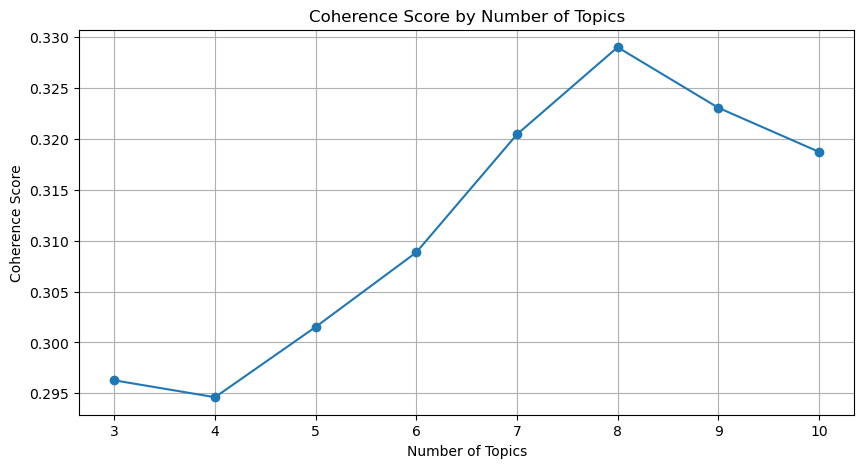

In [48]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(optim_data['num_topics'], optim_data['coherence'], marker='o')
plt.title('Coherence Score by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(optim_data['num_topics'])  # Ensure all topic counts are labeled
plt.grid(True)
plt.show()

The model looks marginally better, that topics make more sense semantically, when the number is 6. That's our model. Let's refine it further.

In [49]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=6, random_state=42, passes=10, alpha="auto", per_word_topics=True)
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.041696  0.000643       1        1  24.112590
5      0.010510 -0.057561       2        1  21.486723
3     -0.083844  0.015565       3        1  21.379851
0      0.020676 -0.022858       4        1  19.984302
1      0.036843  0.062095       5        1   7.365407
4      0.057510  0.002116       6        1   5.671128, topic_info=           Term         Freq        Total Category  logprob  loglift
24         bank  4760.000000  4760.000000  Default  30.0000  30.0000
565   inflation  4681.000000  4681.000000  Default  29.0000  29.0000
9732   pandemic  1072.000000  1072.000000  Default  28.0000  28.0000
1023  financial  2229.000000  2229.000000  Default  27.0000  27.0000
1989    banking  1110.000000  1110.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
300        term    98.830427  2306.627615   Topic6  -5.6073  -0.2804
326        work    81.973714  1106.524873   Topic6  -5.7944   0.2672
245        rate   104.977389  4355.631654   Topic6  -5.5470  -0.8557
182        long    86.777122  1772.027782   Topic6  -5.7374  -0.1468
143        high    85.290350  1898.524937   Topic6  -5.7547  -0.2330

[545 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
5183      2  0.925036         aachen
1743      1  0.693472  accommodation
1743      2  0.030151  accommodation
1743      3  0.150755  accommodation
1743      4  0.090453  accommodation
...     ...       ...            ...
800       5  0.204300            yes
800       6  0.025537            yes
3263      1  0.020159           zeit
3263      2  0.967630           zeit
9213      1  0.853580              è

[1464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 4, 1, 2, 5])

Some arguments still look very similar to each other. Now what we want to understand better what topics are exactly about. There are several strategies we can use to label the topics:

- Read the interviews that are identified with a specific topic

Look at whether topics correlate with other stuff like:

- Year of the interview
- Who is being interviewed?
- Who is interviewing?

In [50]:
num_topics = 6
# Prepare to store topic proportions
topic_proportions = {f'topic_{i}': [] for i in range(num_topics)}

# Extract topic proportions for each document
for bow in corpus:
    sparse_distribution = lda_model.get_document_topics(bow, minimum_probability=0)
    # Create a full distribution (ensure each topic is represented)
    full_distribution = {topic: 0 for topic in range(num_topics)}
    full_distribution.update(dict(sparse_distribution))
    
    # Append the proportions to the correct lists
    for topic_id, prop in full_distribution.items():
        topic_proportions[f'topic_{topic_id}'].append(prop)
        
# Add each topic proportion as a new column in the dataset
for topic, proportions in topic_proportions.items():
    dataset[topic] = proportions

C:\Users\anato\AppData\Local\Temp\ipykernel_19764\3289025729.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[topic] = proportions
C:\Users\anato\AppData\Local\Temp\ipykernel_19764\3289025729.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[topic] = proportions
C:\Users\anato\AppData\Local\Temp\ipykernel_19764\3289025729.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [53]:
dataset.sort_values("topic_1", ascending = False)

,year,title,content,content_clean,language,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
255,2017,Interview with the Financial Times,"Interview with Sabine Lautenschläger, Member o...",interview Sabine Lautenschläger Member Executi...,en,0.000055,0.999751,0.000067,0.000042,0.000025,0.000060
168,2015,Interview with Handelsblatt,"Sabine Lautenschläger, Member of the Executive...",Sabine Lautenschläger Member Executive Board E...,en,0.000098,0.999552,0.000122,0.000075,0.000045,0.000108
329,2019,Interview with hr-iNFO – the Interview,"Interview with Sabine Lautenschläger, Member o...",interview Sabine Lautenschläger Member Executi...,en,0.000101,0.999541,0.000125,0.000077,0.000046,0.000111
346,2020,INTERVIEW\n\nInterview with The New York Times,"Interview with Christine Lagarde, President of...",interview Christine Lagarde President ECB cond...,en,0.000296,0.998651,0.000366,0.000227,0.000135,0.000325
412,2021,INTERVIEW\n\nInterview with Bloomberg TV,"Interview with Frank Elderson, Member of the E...",interview Frank Elderson Member Executive Boar...,en,0.000299,0.998637,0.000370,0.000229,0.000137,0.000328
...,...,...,...,...,...,...,...,...,...,...,...
353,2020,INTERVIEW\n\nWritten interview with Harvard In...,"Interview with Christine Lagarde, President of...",interview Christine Lagarde President ECB Octo...,en,0.078098,0.000034,0.000082,0.196646,0.725068,0.000073
526,2023,INTERVIEWInterview with Financial Times,"Interview with Philip R. Lane, Member of the E...",interview Philip Lane Member Executive Board E...,en,0.000060,0.000030,0.003711,0.996107,0.000027,0.000065
500,2023,INTERVIEWInterview with The Currency,"Interview with Philip R. Lane, Member of the E...",interview Philip Lane Member Executive Board E...,en,0.000056,0.000029,0.000070,0.999758,0.000026,0.000062
33,2007,Interview with the Financial Times and the Fin...,"Interview with Jean-Claude Trichet, President ...",interview Jean Claude Trichet President ECB co...,en,0.000037,0.000019,0.000046,0.000029,0.000017,0.999852


In [149]:
dataset.loc[dataset['topic_6'] > 0.95, 'content']

C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\anato\anaconda3\envs\python-econ\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\anato\anaconda3\envs\python-econ\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.

KeyError: 'topic_6'

Another application that might be interesting for a more journalistic or artistic analysis:

- Measuring lexical richness of a text.

That's a method that is often used to measure the complexity of a text. The methods are manifold, as there exists many measures of text complexity, all algorithmic.

- We could also look at machine learning ones.

In [29]:
!pip install lexicalrichness

     ---------------------------------------- 0.0/97.8 kB ? eta -:--:--
     --------------- ---------------------- 41.0/97.8 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 97.8/97.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15483 sha256=69d3689af86b6d29b3df946b22d4e51a9e0eb2ea2c1356ba03f5452ce1057cf3
  Stored in directory: c:\users\anato\appdata\local\pip\cache\wheels\eb\40\d0\053edb84485f223effdbf0f91fc2b6ec6fc6cf2230aadca09a
Successfully built lexicalrichness


In [55]:
from lexicalrichness import LexicalRichness

# text example
percy = """
I met a traveller from an antique land,
Who said—Two vast and trunkless legs of stone
Stand in the desert. . . . Near them, on the sand,
Half sunk a shattered visage lies, whose frown,
And wrinkled lip, and sneer of cold command,
Tell that its sculptor well those passions read
Which yet survive, stamped on these lifeless things,
The hand that mocked them, and the heart that fed;
And on the pedestal, these words appear:
My name is Ozymandias, King of Kings;
Look on my Works, ye Mighty, and despair!
Nothing beside remains. Round the decay
Of that colossal Wreck, boundless and bare
The lone and level sands stretch far away.
"""

# instantiate new text object (use the tokenizer=blobber argument to use the textblob tokenizer)
lex = LexicalRichness(percy).yulek
print(lex)

117.35537190082646


In [56]:
pink = """
So, so you think you can tell
Heaven from Hell
Blue skies from pain
Can you tell a green field
From a cold steel rail
A smile from a veil?
Do you think you can tell?
"""

# instantiate new text object (use the tokenizer=blobber argument to use the textblob tokenizer)
lex = LexicalRichness(pink).yulek
print(lex)

462.96296296296293


Lyrics of songs or books are the typical applications of this kind of analysis.

- Let's use the billboards top 100 songs from the past 50 years and look at how top songs' complexities have evolved in the past

In [57]:
import pandas as pd

# Import the data
dataset_songs = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding = 'utf-8', encoding_errors = 'replace')
dataset_songs = dataset_songs.loc[dataset_songs['Lyrics'].str.strip() != '', ]

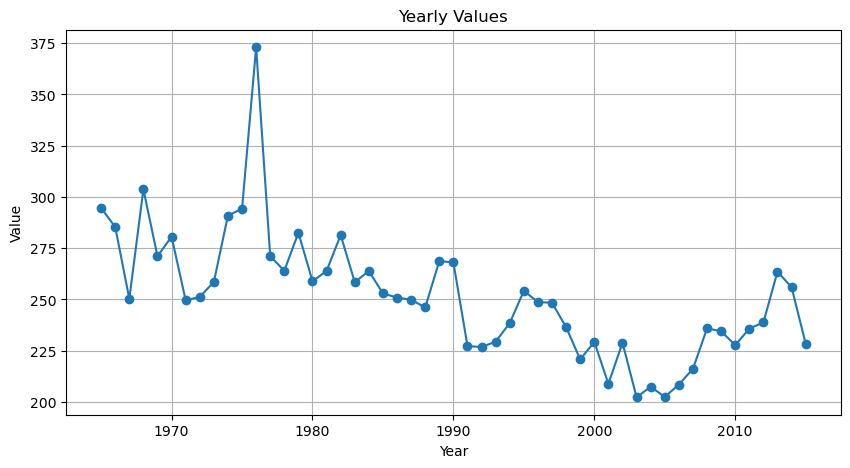

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_songs['complexity'] = dataset_songs["Lyrics"].apply(lambda x: LexicalRichness(x).yulek if isinstance(x, str) else np.nan)
df_plot = dataset_songs.groupby('Year')['complexity'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_plot.index, df_plot, marker='o')
plt.title('Yearly Values')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Sentiment analysis using supervised learning

We've done dictionary based sentiment analysis yesterday. Let's now have a look at machine learning trained algorithms that do sentiment analysis

In [59]:
from transformers import pipeline
from textblob import TextBlob

# create pipeline for sentiment analysis
sentiment_pipeline = pipeline('sentiment-analysis')

sentiment_pipeline('I love Pasta')

C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\pytesseract\pytesseract.py:32: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  numpy_installed = find_loader('numpy') is not None
C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\pytesseract\pytesseract.py:36: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  pandas_installed = find_loader('pandas') is not None
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\anato\anaconda3\envs\python-econ\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated

[{'label': 'POSITIVE', 'score': 0.9997842907905579}]

We create a small function to unpack this pipeline

In [60]:
def text_to_sentiment(sentence):
  result = sentiment_pipeline(sentence)[0]
  if result['label'] == "POSITIVE": return result['score']
  if result['label'] == "NEGATIVE": return -result['score']
  raise ValueError("Unknown result label: " + result['label'])

Let's try as we did with `textblob` and look a the differences

In [61]:
from textblob import TextBlob

first_try = text_to_sentiment('I love pasta')
print(first_try)

second_try = text_to_sentiment('I love pasta, it is the best thing ever')
print(second_try)

third_try = text_to_sentiment('I like pasta')
print(third_try)

fourth_try = text_to_sentiment('I hate pasta')
print(fourth_try)

0.9997842907905579
0.9998667240142822
0.9989023208618164
-0.9990156888961792


In [151]:
# It's better to be darth vador than Latisha apparently
print(text_to_sentiment('My name is Latisha'))
print(text_to_sentiment('My name is Darth Vador'))
print(text_to_sentiment("My name is John"))

-0.9962577819824219
0.983717679977417
0.994888961315155


This classifier also makes the mistake not to be so good at undertone.

- We would need to retrain it to make it better.

In [152]:
orwell = text_to_sentiment('Some animals are more equal than others.')
print(orwell)

0.9974222183227539


What about with our Jane Austen quote?

In [153]:
jane_austen = text_to_sentiment(
"""
An unhappy alternative is before you, Elizabeth. From this day you must be a stranger to one of your parents.
Your mother will never see you again if you do not marry Mr. Collins, and I will never see you again if you do.
""")
print(jane_austen)

-0.9858039617538452


# Large LLM with python

What about leveraging on the most state-of-the-art technology? Generative language model?

- These models are often too big to be contained on your computer.
- They are also quite often proprietary, and people don't want to give it away for free:
    - that might be a good thing?
    
Let's see how to access ChatGPT from your python.

- That might be useful in all the applications we've seen as it gives you another way to perform any operation

You need the openAI library and you need to get an API key

- Getting an API key from chatGPT costs you money, but not that much. With 5€ you probably have enough access to do some small scale projects

In [163]:
!pip install openai

   ---------------------------------------- 0.0/320.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/320.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  317.4/320.6 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 320.6/320.6 kB 4.0 MB/s eta 0:00:00


Here I'm using my api key, this code won't work if you're not using yours.

In [62]:
# Import all relevant packages
import pandas as pd
from openai import OpenAI
import my_api_key

# Open the connexion with Open-AI. API key should not be shared.
client = OpenAI(
    # This is the default and can be omitted
    api_key=my_api_key.my_api_key,
)


Then I can just ask questions to chat GDP directly from python.

- Bear in mind that each time you ask a question, you pay money based on question length and answer length

In [63]:
# The base message is important, the "role": "system" defines a new chatgpt chatbot, trained from chatgpt,
# but with different intructions, it defines the chatgpt we talk to.
messages = [{"role": "user", "content": "Hi Chat, can you tell me about the three body problem?"}]

chat_completion = client.chat.completions.create(
            messages=messages,
            model="gpt-3.5-turbo-0125",
        )

print(chat_completion.choices[0].message.content.strip())

The three-body problem is a classical mechanics problem that involves predicting the motion of three massive objects (such as stars or planets) that are interacting with each other through gravitational forces. This problem is significantly more complex than the two-body problem, where only two bodies are considered, as the interactions between the three bodies can cause chaotic and unpredictable behavior.

The three-body problem has been studied for centuries, and it is known for its mathematical challenges and lack of a general solution. In fact, it was proven by mathematician Henri Poincare in the late 19th century that there is no general analytical solution to the three-body problem. As a result, researchers have turned to numerical methods and computer simulations to study the behavior of three-body systems.

Despite its complexity, the three-body problem has been instrumental in advancing our understanding of celestial mechanics and dynamical systems. It has also led to the disc

The amazing feature about using chatgpt from python, is that you can pretrain chatgpt before you use it

In [64]:
messages = [{"role": "system", "content": """
    Your role is to explain astrophysics in very simple terms
    to individuals that study social sciences. Your answers should
    not do more than 100 words.
    """},
    {"role": "user", "content": "Hi Chat, can you tell me about the three body problem?"}]

chat_completion = client.chat.completions.create(
            messages=messages,
            model="gpt-3.5-turbo-0125",
        )

print(chat_completion.choices[0].message.content.strip())

Sure! The three-body problem in astrophysics refers to the challenge of predicting the motion of three massive objects (like stars or planets) interacting with each other through gravity. It's notoriously difficult because the gravitational forces between the three bodies create complex and unpredictable paths. This problem is significant because it showcases the limitations of our ability to precisely forecast the movements of celestial objects in certain situations.


Using this kind of tools can make information extraction from a text much simpler and less error prone:

- The issue being that you need to pay for it.